## Introduction to Scikit-Learn (sklearn)
### This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a tarined model
7. Puting it all thgether.

###  0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Crate X (features matrix)
x = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [3]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3


In [5]:
clf.fit(x_train, y_train);

In [6]:
# Make a prediction
# y_lable = clf.predict(np.array([0, 2, 3, 4]))

In [7]:
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [8]:
y_test

170    0
7      1
153    1
158    1
113    1
      ..
116    1
199    0
90     1
87     1
29     1
Name: target, Length: 61, dtype: int64

In [9]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [10]:
clf.score(x_test, y_test)

0.8524590163934426

In [11]:
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.88      0.86      0.87        35

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[22,  4],
       [ 5, 30]], dtype=int64)

In [13]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [14]:
## 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%

Trying model with 20 estimators...
Model accuracy on test set: 85.25%

Trying model with 30 estimators...
Model accuracy on test set: 85.25%

Trying model with 40 estimators...
Model accuracy on test set: 83.61%

Trying model with 50 estimators...
Model accuracy on test set: 86.89%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 85.25%

Trying model with 80 estimators...
Model accuracy on test set: 81.97%

Trying model with 90 estimators...
Model accuracy on test set: 85.25%



In [15]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [16]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8524590163934426

In [17]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
executable: C:\Users\Dilun\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe
   machine: Windows-10-10.0.22631-SP0

Python dependencies:
      sklearn: 1.4.1.post1
          pip: 24.2
   setuptools: 65.5.0
        numpy: 1.24.4
        scipy: 1.10.1
       Cython: None
       pandas: 2.2.2
   matplotlib: 3.7.5
       joblib: 1.3.2
threadpoolctl: 3.4.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 16
         prefix: libopenblas
       filepath: C:\Users\Dilun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
        version: 0.3.21
threading_layer: pthreads
   architecture: Zen

       user_api: openmp
   internal_api: openmp
    num_threads: 16
       

## 1. Getting our data ready to be used with machine learning

 Three main things we have to do:
 1. Split the data into features and labels (usually 'X' & 'y')
 2. Filling (also called imputing) or disregarding missing values
 3. Converting non-numerical values to numerical values (also called feature encoding)

In [18]:
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [23]:
x.shape[0] * 0.8

242.4

In [24]:
len(heart_disease)

303

In [25]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [27]:
# Split into X/y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1)

In [28]:
# # Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model  = RandomForestClassifier()
# model.fit(x_train, y_train)
# model.score(x_test, y_test)

In [29]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categories_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [31]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [32]:
# Let's refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.3235867221569877

In [33]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [34]:
model.score(x_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

 1. Fill them with some value (also known as imputation)
 2. Remove the samples with missing data altogether

In [35]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# Crate X & y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [38]:
# Let's try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x


<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill missing data with Pandas

In [39]:
# Fill missing data with pandas
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

# drop rows with missing Price value
car_sales_missing.dropna(inplace=True)

C:\Users\Dilun\AppData\Local\Temp\ipykernel_4768\4262488784.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
C:\Users\Dilun\AppData\Local\Temp\ipykernel_4768\4262488784.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [40]:
len(car_sales_missing)

950

In [41]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [42]:
# Let's try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [43]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [44]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [46]:
# Split into X & y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [47]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [48]:
car_sales_filled = pd.DataFrame(filled_x, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [49]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [50]:
# Let's try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [51]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [52]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choose the right estimator/algorithm for our problems

Some things to note:
* Sklearn refers to machine learning models and algorithms as estimators.
* Classification problem - predicting whether a sample is one thing or another
    * Sometimes you'll see clf (short for classifier) used as a classification estimator
* Regression problem - predicting a number (Sell price of a car)

### 2.1 Pick a machine learning model for regression problem
Let's use the California housing dataset

In [53]:
# Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [54]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [55]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [56]:
# import the algorithm
from sklearn.linear_model import Ridge

# set up random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house prices in $100000s

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the Ridge model on test data
model.score(x_test, y_test)

0.5758549611440127

What if Ridge didn't work or the score wasn't high enough?

Well, we always can try another model

How about we try an ensemble model?(an ensemble model is a model made up of many models)

Sklearn's emsemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [57]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Set up random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house prices in $100000s

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Ridge model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Check the score of the Ridge model on test data
model.score(x_test, y_test)

0.8065734772187598

## 2. Picking a machine learning model for a classification problem

In [58]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC

In [60]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Set up random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(x_train, y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

C:\Users\Dilun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Dilun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [61]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [62]:
# Import the LinearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest classifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

0.8524590163934426

Tidbit:
1. If you have structured data, used ensemble methodes
2. If you have unstructured data, use deep learning or transfer learning

In [63]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/algorithm on our data and use it to make predictions
### 3.1 Fit the model to data

Different names for:
* `x` = features, features variables, data
* `y` = labels, targets, target variables

In [64]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest classifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate the random forest classifier
clf.score(x_test, y_test)

0.8524590163934426

In [65]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [66]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [67]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model
2 ways to make predictions:
1. `predict?()`
2. `predict_proba()`

In [68]:
# Use a trained model to make predictions
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [71]:
clf.score(x_test, y_test)

0.8524590163934426

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make prditction with `predict_proba()`

In [73]:
# predict_proba() returns probablities of a classification label
clf.predict_proba(x_test[:5])


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [74]:
# Let's predict on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [75]:
heart_disease["target"].value_counts() 

target
1    165
0    138
Name: count, dtype: int64

In [76]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict()` can also be used for regression models

In [77]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [78]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create the model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

In [79]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [80]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [81]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [82]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

There are 3 ways to evaluate Scikit-Learn models/estimators:
 1. Estimator's built-in `score()` method
 2. The `scoring` parameter
 3. Problem-specific metric functions.

### 4.1 Evaluating a model with the `score` method

In [83]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create x, y
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=10)

# create classifier model instance
clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [84]:
# The higher the score, the better the model
clf.score(x_train, y_train)

1.0

In [85]:
clf.score(x_test, y_test)

0.9

Let's use -the `score()` on our regression problem 

In [86]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create the model instance
model = RandomForestRegressor(n_estimators=80)

# Fit the model to the data
model.fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

In [87]:
model.score(x_test, y_test)

0.8062702737063999

### 4.2 Evaluating a model using the `scoring` parameter

In [88]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create the model instance
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data
clf.fit(x_train, y_train)


RandomForestClassifier()

In [89]:
clf.score(x_test, y_test)

0.8524590163934426

In [90]:
cross_val_score(clf, x, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [91]:
cross_val_score(clf, x, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [92]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(x_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [93]:
# # Default scoring parameter of classifier = mean accuracy
# clf.score()

In [94]:
# Scoring parameter set to None by default
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Accuracy

In [95]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, x, y, cv=5)

In [97]:
np.mean(cross_val_score)

0.8248087431693989

In [98]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC curve

ROC curve are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = Model predicts 1 when truth is 0
* Tru negative = Model predicts 0 when truth is 0
* False negative = Model predicts 0 when truth is 1


In [99]:
# Crate X_train, X_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [100]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [101]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [102]:
# Calculate fp, tp, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [103]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

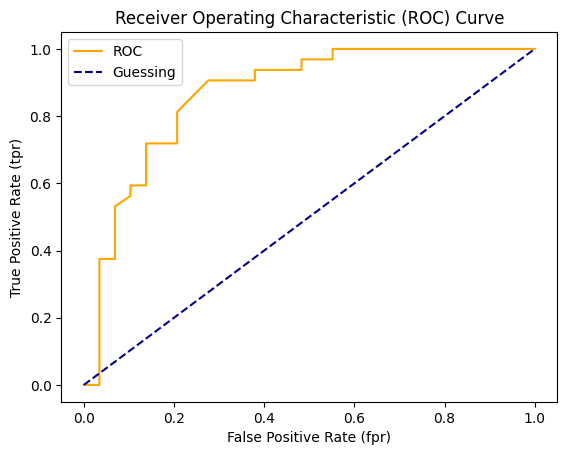

In [104]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plt_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plt_roc_curve(fpr, tpr)

In [105]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

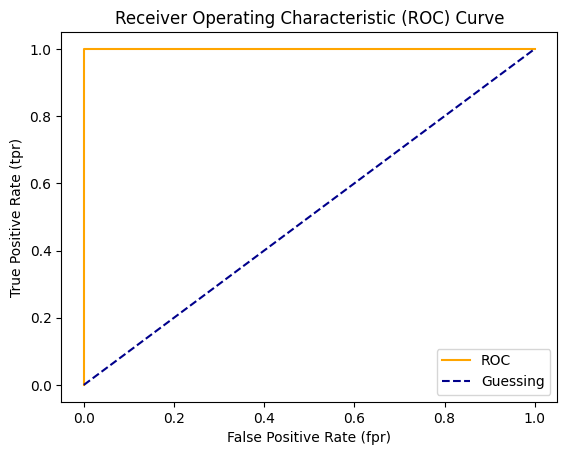

In [106]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plt_roc_curve(fpr, tpr)

In [107]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [108]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [109]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [110]:
len(x_test)

61

<Axes: >

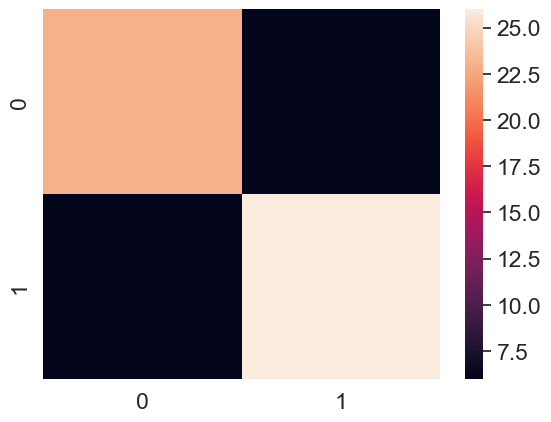

In [113]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
con_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(con_mat)

**confusion matrix**

The next way to evaluate a classification model is by using a confusion matrix. 
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [114]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [115]:
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


### Create a confusion matrix with sklearn

To use the `confusion_matrix` function from `sklearn.metrics` you will need sklearn version 1.0 or above.

In [116]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
executable: C:\Users\Dilun\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe
   machine: Windows-10-10.0.22631-SP0

Python dependencies:
      sklearn: 1.4.1.post1
          pip: 24.2
   setuptools: 65.5.0
        numpy: 1.24.4
        scipy: 1.10.1
       Cython: None
       pandas: 2.2.2
   matplotlib: 3.7.5
       joblib: 1.3.2
threadpoolctl: 3.4.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 16
         prefix: libopenblas
       filepath: C:\Users\Dilun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
        version: 0.3.21
threading_layer: pthreads
   architecture: Zen

       user_api: openmp
   internal_api: openmp
    num_threads: 16
       

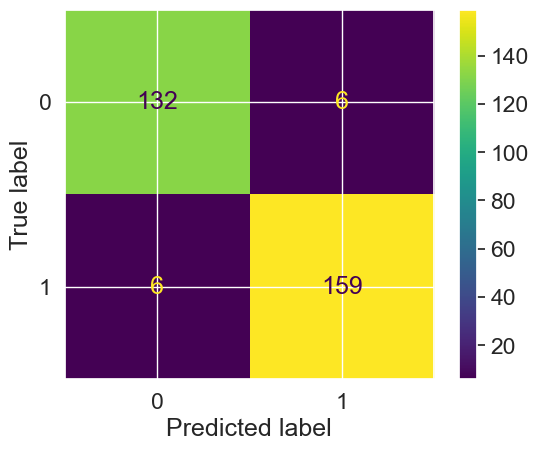

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y)

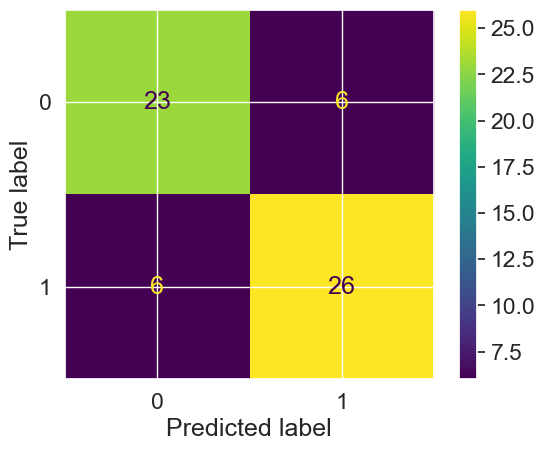

In [122]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

Classification Report

In [123]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [124]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\Dilun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dilun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dilun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documatation - https://scikit-learn.org/stable/modules/model_evaluation.html

The ones we're going to focus on are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [127]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [128]:
model.score(x_test, y_test)

0.8065734772187598

In [129]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [130]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [131]:
y_test.mean()

2.0550030959302323

In [135]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [136]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [137]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

**Mean Absolute Error (MAE)**

MAE is the average of the absolute differnces between predictions and actual values. 
It gives you an idea of how wrong your models predictions are.

In [138]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [140]:
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [142]:
# MEA using formula and differences
np.abs(df["differences"]).mean()

0.32659871732073664

**Mean Squared Error (MSE)**

MSE is the average of the squared differences between predicted and actual values. It gives more weight to larger differences. For example, the difference between 10 and 0 is 10 but the difference between 20 and 10 is also 10, squaring these differences makes the second difference appear larger.

In [145]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [147]:
df["Square_differencess"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,Square_diff,Square_differencess
20046,0.47700,0.493840,0.016840,0.000284,0.000284
3024,0.45800,0.754940,0.296940,0.088173,0.088173
15663,5.00001,4.928596,-0.071414,0.005100,0.005100
20484,2.18600,2.543160,0.357160,0.127563,0.127563
9814,2.78000,2.331760,-0.448240,0.200919,0.200919


In [149]:
# Calculate MSE using by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [160]:
df_large_error = df.copy()
df_large_error.iloc[0]["square_differences"] = 16

C:\Users\Dilun\AppData\Local\Temp\ipykernel_4768\2464324312.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["square_differences"] = 16


In [162]:
df_large_error.head()

,actual values,predicted values,differences,Square_diff,Square_differencess
20046,0.47700,0.493840,0.016840,0.000284,0.000284
3024,0.45800,0.754940,0.296940,0.088173,0.088173
15663,5.00001,4.928596,-0.071414,0.005100,0.005100
20484,2.18600,2.543160,0.357160,0.127563,0.127563
9814,2.78000,2.331760,-0.448240,0.200919,0.200919


In [163]:
# Calculate MSE with large error
np.square(df_large_error["differences"]).mean()

0.2534678520824551

In [165]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,Square_diff,Square_differencess
20046,0.47700,0.493840,0.016840,0.000284,0.000284
3024,20.00000,20.000000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000,20.000000
...,...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255,0.170255
16623,2.66800,1.947760,-0.720240,0.518746,0.518746
18086,5.00001,4.836378,-0.163632,0.026775,0.026775
2144,0.72300,0.717820,-0.005180,0.000027,0.000027


### 4.2.3 Finally using the `scoring` parameter

In [166]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [168]:
np.random.seed(42)

# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None) # if scoring=None, it uses default scoring method of the classifier
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [169]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [170]:
np.random.seed(42)

cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [171]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [173]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [174]:
# Cross-validated precision
print(f'The cross-validated precision is: {np.mean(cv_precision):.2f}')

The cross-validated precision is: 0.83


In [176]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [177]:
# Cross-validated recall
print(f'The cross-validated recall is: {np.mean(cv_recall):.2f}')

The cross-validated recall is: 0.85


In [178]:
# F1
np.random.seed(42)
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [179]:
# Cross-validated F1
print(f'The cross-validated F1 is: {np.mean(cv_f1):.2f}')

The cross-validated F1 is: 0.84


Let's see the `scoring` parameter being used for regression problems.

In [180]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [184]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [185]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [190]:
# Mean squard error
cv_mse = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.43056266950079847

In [191]:
cv_mse

array([-0.51869435, -0.34901694, -0.37285132, -0.4457963 , -0.46645444])

In [192]:
# Mean squared error
cv_mae = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4659836485174419

In [193]:
cv_mae

array([-0.54585821, -0.40921632, -0.43850295, -0.46259735, -0.47374341])

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate Scikit-Learn models/estimators is using the `scoring` parameter with a string. - https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [196]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create x, y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Crate the model
clf = RandomForestClassifier(n_estimators=100)

# Fit the model
clf.fit(x_train, y_train)

# Make some predictions
y_preds = clf.predict(x_test)

# Evaluate the model
print("Classifier metrics on the test set")
print(f"Accuracy: {clf.score(x_test, y_test)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")


Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [202]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create x, y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Crate the model
model = RandomForestRegressor()

# Fit the model``
model.fit(x_train, y_train)

# Make some predictions
y_preds = model.predict(x_test)

# Evaluate the model
print("Regressor metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regressor metrics on the test set
R^2: 0.5106393318965518
MAE: 0.23754098360655734
MSE: 0.12204426229508197
